In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
bias = 100
X, y, coef = make_regression(n_features=1, bias=bias, random_state=42, coef=True)

In [4]:
X.shape, y.shape

((100, 1), (100,))

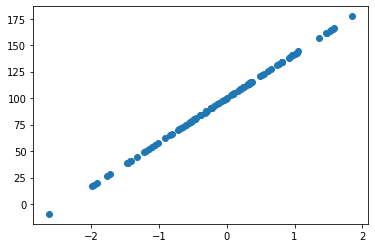

In [5]:
plt.scatter(X, y)

In [6]:
bias = 100
X, y, coef = make_regression(n_features=1,noise=10, bias=bias, random_state=42, coef=True)

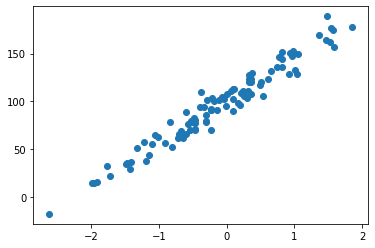

In [7]:
plt.scatter(X, y)

In [9]:
coef, bias  # here I have m and c from sklearn

(array(41.74110031), 100)

In [10]:
y_gen = X * coef + bias  # yh = mx + c

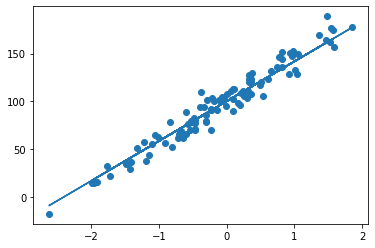

In [12]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [13]:
# lets plot a line using linear regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X, y)
# work during training -- figuring out m & c (coef & intercept)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([44.43716999])

In [19]:
model.intercept_

101.16511532052698

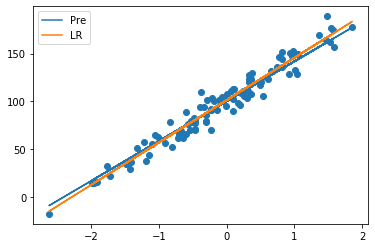

In [22]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")   # from sklearn
plt.plot(X, model.predict(X), label="LR")  # from LR
plt.legend()

In [29]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
        
    # training function i.e fit
    def fit(self, X, y):
        self._X = X  # X mock behaviour like private
        self._y = y.reshape(-1, 1)  # 2-D array so that we can do calculations
        
        #need to figure out value of coef and intercept
        # step 1: pick these value at random
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient decend
        errors = []
        
        # lets say we do thiss 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
            
        return errors
    
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
        
        
    def gradient(self):
        yh = self.predict(self._X)  # from predict function
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [30]:
model = LinearRegCustom(lr=.1)

In [31]:
errors = model.fit(X, y)

In [32]:
model.coef_, model.intercept_

(43.254626195695415, 100.29825481347473)

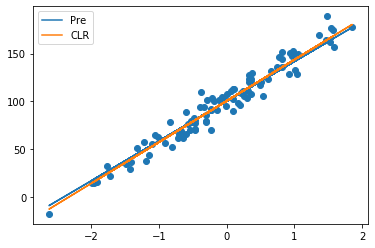

In [33]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

In [34]:
errors

[896799.7901089669,
 742408.9973857242,
 615366.353406356,
 510735.8502259089,
 424487.7617993949,
 353329.70834732015,
 294569.62211900577,
 246004.52480253563,
 205830.19964810967,
 172567.78670875396,
 145004.09182962522,
 122143.01481262736,
 103165.99824085967,
 87399.79884973228,
 74290.20665040697,
 63380.59819318229,
 54294.42143546321,
 46720.88033919932,
 40403.22536923331,
 35129.16778348392,
 30723.02606470044,
 27039.28612598161,
 23957.316322054725,
 21377.026472518875,
 19215.299196122163,
 17403.05359774976,
 15882.827140227124,
 14606.78250090274,
 13535.063271357812,
 12634.436245905972,
 11877.169358222254,
 11240.103549079133,
 10703.884373431953,
 10252.325299358828,
 9871.87967193657,
 9551.202420765525,
 9280.785949981942,
 9052.65740183495,
 8860.126741103762,
 8697.57695874915,
 8560.2892132542,
 8444.29697739565,
 8346.2642858246,
 8263.384024888632,
 8193.292903295527,
 8134.00031720818,
 8083.828798002957,
 8041.364123077421,
 8005.413494380539,
 7974.970457

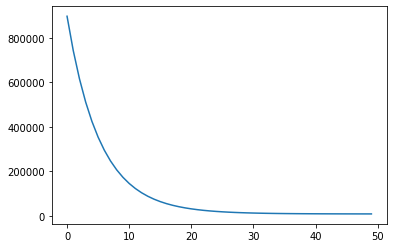

In [35]:
plt.plot(errors)

In [36]:
# if we put lr=15 , then oscillations will occur

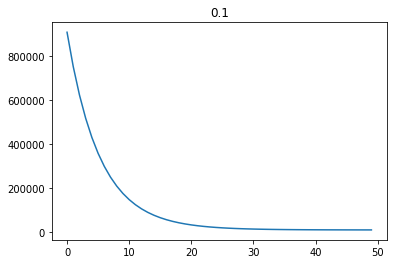

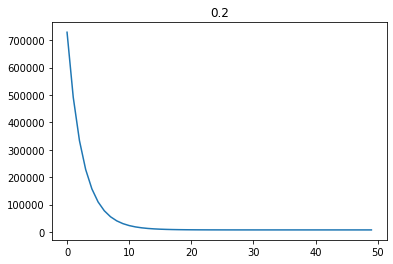

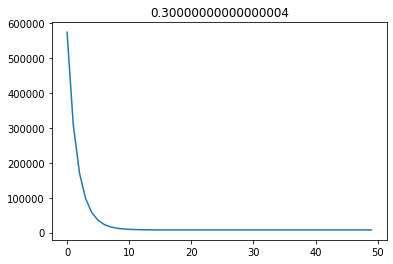

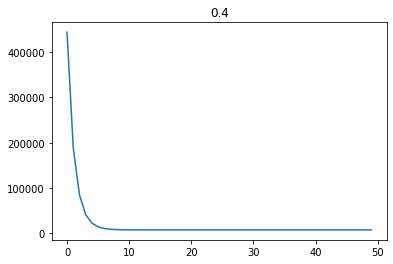

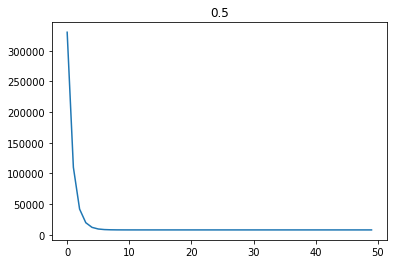

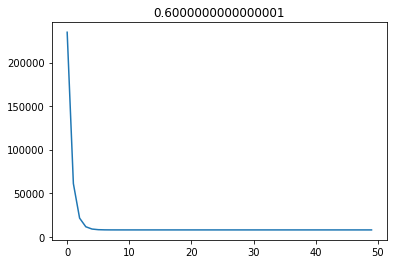

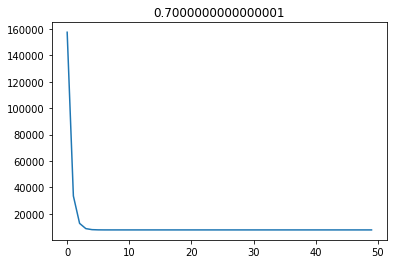

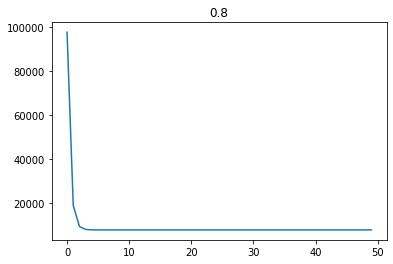

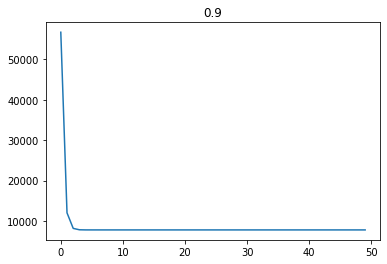

In [37]:
# to see which lr is best
for i in range(1, 10):
    model = LinearRegCustom(lr = .1 * i)
    errors = model.fit(X, y)
    
    plt.figure()
    plt.title(str(.1 * i))
    plt.plot(errors)

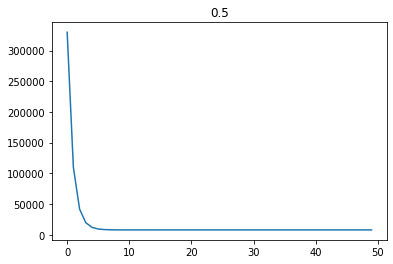

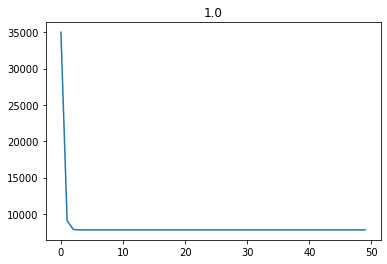

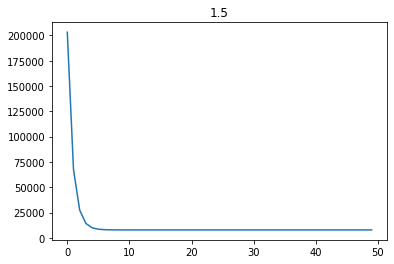

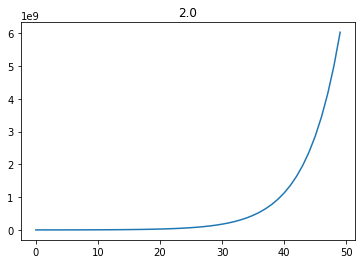

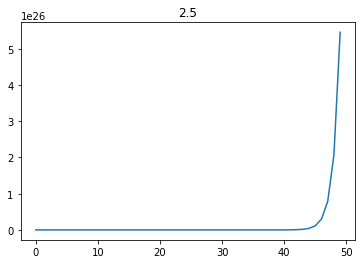

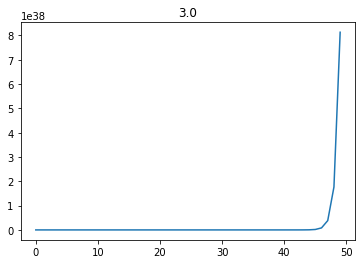

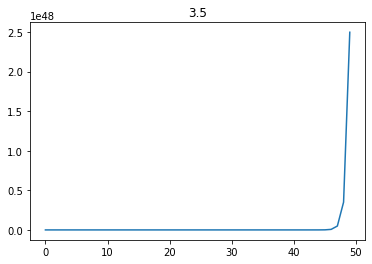

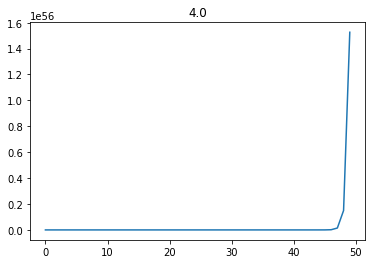

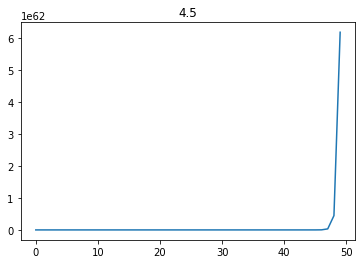

In [38]:
for i in range(1, 10):
    model = LinearRegCustom(lr = .5 * i)
    errors = model.fit(X, y)
    
    plt.figure()
    plt.title(str(.5 * i))
    plt.plot(errors)

So learning rate must be below 2

# Housing Problem

In [39]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [40]:
X, y = load_boston(return_X_y=True)

In [41]:
boston = load_boston()

In [44]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [45]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
model.predict(X[:1])

array([29.99003492])

In [51]:
y_test[:1]

array([23.6])

In [52]:
X_test[:1]

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]])